In [1]:
import fastf1
import fastf1.plotting
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from openpyxl.styles import PatternFill
from openpyxl import Workbook
from openpyxl import load_workbook
from datetime import datetime, timedelta
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
from matplotlib import cm
from scipy.interpolate import make_interp_spline
from fastf1 import utils


# enabling misc_mpl_mods will turn on minor grid lines that clutters the plot
fastf1.plotting.setup_mpl(mpl_timedelta_support=False, misc_mpl_mods=False)

In [2]:
ses = 4
race = 16
session = fastf1.get_session(2023,race,ses)
session.load()
fastf1.Cache.enable_cache('cache') 

api         WARNING 	

NO CACHE! Api caching has not been enabled! 
	It is highly recommended to enable this feature for much faster data loading!
	Use `fastf1.Cache.enable_cache('path/to/cache/')`

core           INFO 	Loading data for Japanese Grand Prix - Qualifying [v2.3.1]
api            INFO 	Fetching driver list...
core        WARNING 	Failed to load data from Ergast API! (This is expected for recent sessions)
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
c:\Users\GTR\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():
c:\Users\GTR\AppData\Local\Programs\Python\Python311\Lib\site

### Pre defined

In [3]:
compound_color = {'HARD': 'F0F0EC', 
                  'INTERMEDIATE': '43B02A', 
                  'MEDIUM': 'FFD12E', 
                  'SOFT': 'DA291C', 
                  'TEST-UNKNOWN': '434649', 
                  'UNKNOWN': '00FFFF', 
                  'WET': '0067AD'}
compound = ['All Compounds','SOFT','MEDIUM','HARD']
df_compoundcolor = pd.DataFrame.from_dict(compound_color, orient='index', columns=['CompoundColor'])

### Telemetry 2 drivers

In [111]:
driver_1, driver_2 = 'VER', 'PIA' 
# Laps can now be accessed through the .laps object coming from the session
laps_driver_1 = session.laps.pick_driver(driver_1)
laps_driver_2 = session.laps.pick_driver(driver_2)


# Select the fastest lap
fastest_driver_1 = laps_driver_1.pick_fastest()
fastest_driver_2 = laps_driver_2.pick_fastest()


# Retrieve the telemetry and add the distance column
telemetry_driver_1 = fastest_driver_1.get_telemetry()
telemetry_driver_2 = fastest_driver_2.get_telemetry()

# Make sure whe know the team name for coloring
team_driver_1 = fastest_driver_1['Team']
team_driver_2 = fastest_driver_2['Team']
delta_time, ref_tel, compare_tel = utils.delta_time(fastest_driver_1, fastest_driver_2)

df = pd.read_csv("C:/Users/GTR/Documents/GitHub/F1-Circuits-Corners/corners_circuits/Japan_Suzuka.csv")
corners_distance = df["Distance"]

In [167]:
corners_distance

0      672.110833
1      842.964167
2     1101.292359
3     1214.202670
4     1361.025278
5     1540.420278
6     1783.264722
7     2269.346389
8     2423.994095
9     2749.120000
10    2894.033217
11    3361.272222
12    3794.271944
13    3947.466736
14    4960.136667
15    5359.780283
16    5412.800278
17    5555.138791
Name: Distance, dtype: float64

legend      WARNING 	No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


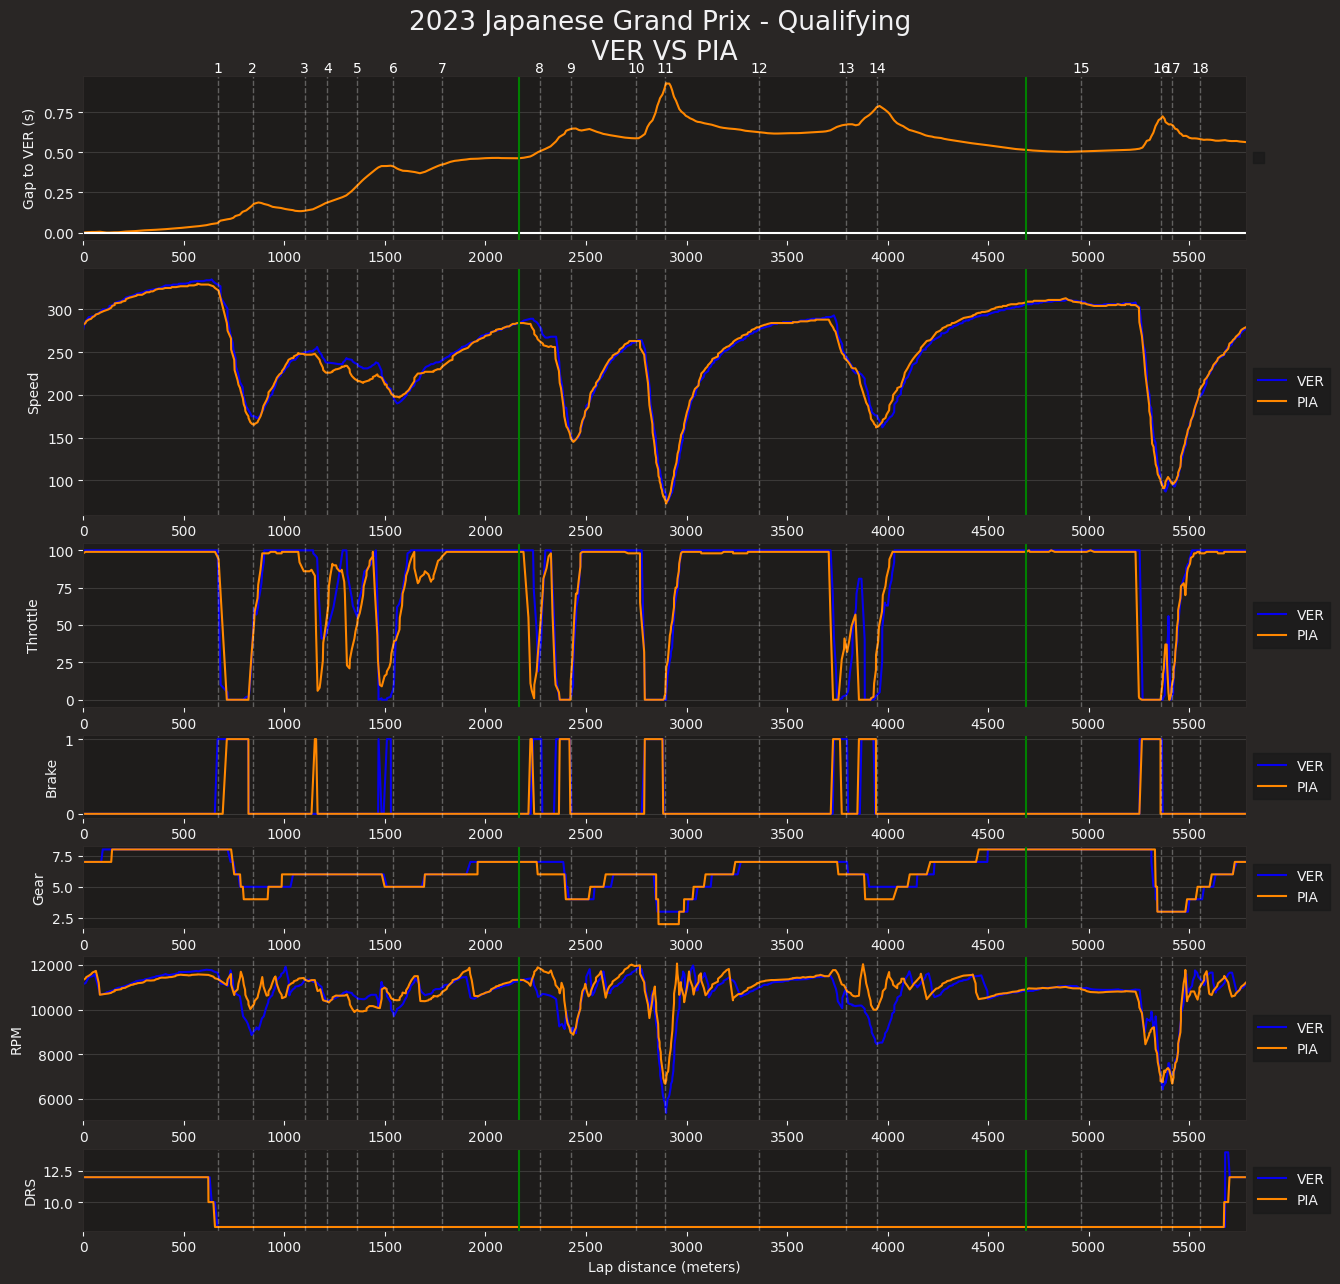

In [112]:

# plt.style.use("cyberpunk")
plot_size = [15, 15]
plot_title = f"{session.event.year} {session.event.EventName} - {session.name} \n {driver_1} VS {driver_2} "
plot_ratios = [ 2, 3, 2, 1, 1, 2, 1]
plot_filename = plot_title.replace(" ", "") + ".png"


# Make plot a bit bigger
plt.rcParams['figure.figsize'] = plot_size

# Create subplots with different sizes
fig, ax = plt.subplots(7, gridspec_kw={'height_ratios': plot_ratios})

# Set the plot title
ax[0].title.set_text(plot_title)
#Delta line
#change plot colour to yellow
ax[0].plot(ref_tel['Distance'], delta_time, color=fastf1.plotting.team_color(team_driver_2))
ax[0].axhline(0, color='white')
ax[0].set(ylabel=f"Gap to {driver_1} (s)")

# Speed trace
ax[1].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Speed'], label=driver_1, color=fastf1.plotting.team_color(team_driver_1))
ax[1].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Speed'], label=driver_2, color=fastf1.plotting.team_color(team_driver_2))
ax[1].set(ylabel='Speed')
ax[1].legend(loc="lower right")

# Throttle trace
ax[2].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Throttle'], label=driver_1, color=fastf1.plotting.team_color(team_driver_1))
ax[2].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Throttle'], label=driver_2, color=fastf1.plotting.team_color(team_driver_2))
ax[2].set(ylabel='Throttle')

# Brake trace
ax[3].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Brake'], label=driver_1, color=fastf1.plotting.team_color(team_driver_1))
ax[3].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Brake'], label=driver_2, color=fastf1.plotting.team_color(team_driver_2))
ax[3].set(ylabel='Brake')

# Gear trace
ax[4].plot(telemetry_driver_1['Distance'], telemetry_driver_1['nGear'], label=driver_1, color=fastf1.plotting.team_color(team_driver_1))
ax[4].plot(telemetry_driver_2['Distance'], telemetry_driver_2['nGear'], label=driver_2, color=fastf1.plotting.team_color(team_driver_2))
ax[4].set(ylabel='Gear')

# RPM trace
ax[5].plot(telemetry_driver_1['Distance'], telemetry_driver_1['RPM'], label=driver_1, color=fastf1.plotting.team_color(team_driver_1))
ax[5].plot(telemetry_driver_2['Distance'], telemetry_driver_2['RPM'], label=driver_2, color=fastf1.plotting.team_color(team_driver_2))
ax[5].set(ylabel='RPM')

# DRS trace
ax[6].plot(telemetry_driver_1['Distance'], telemetry_driver_1['DRS'], label=driver_1, color=fastf1.plotting.team_color(team_driver_1))
ax[6].plot(telemetry_driver_2['Distance'], telemetry_driver_2['DRS'], label=driver_2, color=fastf1.plotting.team_color(team_driver_2))
ax[6].set(ylabel='DRS')
ax[6].set(xlabel='Lap distance (meters)')


# Hide x labels and tick labels for top plots and y ticks for right plots.
# for a in ax.flat:
#     a.label_outer()
for i in range(0,7):
    ax[i].grid(axis = 'y',alpha = 0.2)
    ax[i].set_xticks(range(0, 8000, 500)) 
    ax[i].set_xlim(0, sector_distance[2]) 
    ax[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax[i].axvline(x=sector_distance[0], color='green', linestyle='-')
    ax[i].axvline(x=sector_distance[1], color='green', linestyle='-')
    for j in range(0,len(corners_distance)):
        ax[i].axvline(x=corners_distance[j], color='white', linestyle='--', linewidth=1, alpha=0.3)
for j in range(0,len(corners_distance)):
    ax[0].text(corners_distance[j],delta_time.max()+(delta_time.max()*0.1),str(j+1), ha='center', va='center',color='white')
    
# Store figure
plt.savefig('Graphes/Practice/Telemetry'+session.event["Session"+str(ses)]+'.png', dpi=300, bbox_inches='tight')
plt.show()

### Speed map 

In [115]:
import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
from matplotlib import cm

In [116]:
driverss = [1,81]

driver1 = laps.pick_driver(driverss[0]).pick_fastest()[["Sector1Time","Sector2Time" ,"Sector3Time"]]
driver1["S1"] = driver1["Sector1Time"].total_seconds()
driver1["S2"] = driver1["Sector2Time"].total_seconds()
driver1["S3"] = driver1["Sector3Time"].total_seconds()
driver2 = laps.pick_driver(driverss[1]).pick_fastest()[["Sector1Time","Sector2Time" ,"Sector3Time"]]
driver2["S1"] = driver2["Sector1Time"].total_seconds()
driver2["S2"] = driver2["Sector2Time"].total_seconds()
driver2["S3"] = driver2["Sector3Time"].total_seconds()
comparaison = driver2[["S1","S2","S3"]].reset_index(drop=True) - driver1[["S1","S2","S3"]].reset_index(drop=True)

laps = session.laps
# Select the laps from Hamilton and Verstappen
laps_driver1 = laps.pick_driver(driverss[0])
laps_driver2 = laps.pick_driver(driverss[1])

# Get the telemetry data from their fastest lap
fastest_driver1 = laps_driver1.pick_fastest().get_telemetry()
fastest_driver2 = laps_driver2.pick_fastest().get_telemetry()
# Since the telemetry data does not have a variable that indicates the driver, 
# we need to create that column
fastest_driver1['Driver'] = session.get_driver(str(driverss[0]))["Abbreviation"]
fastest_driver2['Driver'] = session.get_driver(str(driverss[1]))["Abbreviation"]

# Merge both lap telemetries so we have everything in one DataFrame
telemetry = fastest_driver1.append(fastest_driver2)

# We want 25 mini-sectors (this can be adjusted up and down)
num_minisectors = 25

# Grab the maximum value of distance that is known in the telemetry
total_distance = telemetry['Distance'].max()

# Generate equally sized mini-sectors 
minisector_length = total_distance / num_minisectors
# Initiate minisector variable, with 0 (meters) as a starting point.
minisectors = [0]

# Add multiples of minisector_length to the minisectors
for i in range(0, (num_minisectors - 1)):
    minisectors.append(minisector_length * (i + 1))

telemetry['Minisector'] = telemetry['Distance'].apply(
    lambda dist: (
        int((dist // minisector_length) + 1)
    )
)

# Calculate avg. speed per driver per mini sector
average_speed = telemetry.groupby(['Minisector', 'Driver'])['Speed'].mean().reset_index()
# Select the driver with the highest average speed
fastest_driver = average_speed.loc[average_speed.groupby(['Minisector'])['Speed'].idxmax()]

# Get rid of the speed column and rename the driver column
fastest_driver = fastest_driver[['Minisector', 'Driver']].rename(columns={'Driver': 'Fastest_driver'})

# Join the fastest driver per minisector with the full telemetry
telemetry = telemetry.merge(fastest_driver, on=['Minisector'])

# Order the data by distance to make matploblib does not get confused
telemetry = telemetry.sort_values(by=['Distance'])

# Convert driver name to integer
telemetry.loc[telemetry['Fastest_driver'] == session.get_driver(str(driverss[0]))["Abbreviation"], 'Fastest_driver_int'] = 1
telemetry.loc[telemetry['Fastest_driver'] == session.get_driver(str(driverss[1]))["Abbreviation"], 'Fastest_driver_int'] = 2

C:\Users\GTR\AppData\Local\Temp\ipykernel_22648\1519537283.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = fastest_driver1.append(fastest_driver2)


In [117]:
lap_time =[]
for i in driverss:
    timedelta = laps.pick_driver(i).pick_fastest()['LapTime']
    # Extract minutes, seconds, and milliseconds
    minutes = timedelta.components.minutes
    seconds = timedelta.components.seconds
    milliseconds = timedelta.components.milliseconds

    # Format the result as mm:ss:ms
    formatted_time = f'{minutes:02}:{seconds:02}:{milliseconds:03}'
    lap_time.append(formatted_time)


legend      WARNING 	No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


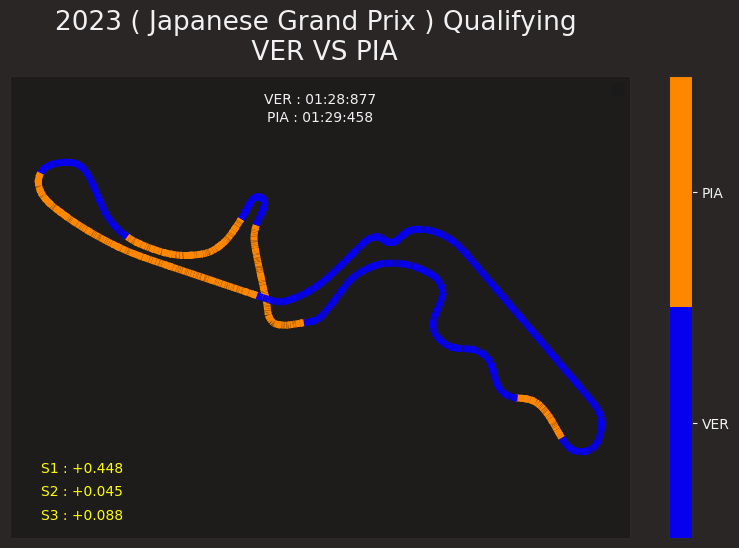

In [119]:
x = np.array(telemetry['X'].values)
y = np.array(telemetry['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
fastest_driver_array = telemetry['Fastest_driver_int'].to_numpy().astype(float)

custom_colors = [fastf1.plotting.team_color(session.get_driver(str(driverss[0]))["TeamName"]), fastf1.plotting.team_color(session.get_driver(str(driverss[1]))["TeamName"])]
cmap = cm.colors.ListedColormap(custom_colors)

# cmap = cm.get_cmap(["blue","red"], 2)
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(fastest_driver_array)
lc_comp.set_linewidth(5)

plt.rcParams['figure.figsize'] = [10, 6]
fig, ax = plt.subplots()

# Hide both x and y-axis
ax.set_xticks([])
ax.set_yticks([])

plt.gca().add_collection(lc_comp)
plt.axis('equal')
# plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

cbar = plt.colorbar(mappable=lc_comp, boundaries=np.arange(1,4))
cbar.set_ticks(np.arange(1.5, 3))
cbar.set_ticklabels([session.get_driver(str(driverss[0]))["Abbreviation"], session.get_driver(str(driverss[1]))["Abbreviation"]])
plt.title('2023 ( '+session.event["EventName"]+' ) Qualifying \n '+session.get_driver(str(driverss[0]))["Abbreviation"]+' VS '+session.get_driver(str(driverss[1]))["Abbreviation"])
plt.legend()
# plt.axis('off')
plt.text(0.5, 0.95, session.get_driver(str(driverss[0]))["Abbreviation"]+' : '+lap_time[0], horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
plt.text(0.5, 0.91, session.get_driver(str(driverss[1]))["Abbreviation"]+' : '+lap_time[1], horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

#sectors text
plt.text(0.05, 0.15, 'S1 : +'+"{:.3f}".format(comparaison[0]), verticalalignment='center', transform=ax.transAxes,color = "yellow")
plt.text(0.05, 0.1, 'S2 : +'+"{:.3f}".format(comparaison[1]), verticalalignment='center', transform=ax.transAxes,color = "yellow")
plt.text(0.05, 0.05, 'S3 : +'+"{:.3f}".format(comparaison[2]), verticalalignment='center', transform=ax.transAxes,color = "yellow")


# plt.savefig(f"2021_ver_ham_q.png", dpi=300)

plt.show()

In [168]:
dismin = 840
dismax = 845

In [169]:
print('Driver 1 :'+str(telemetry_driver_1.loc[(telemetry_driver_1["Distance"]>dismin)&(telemetry_driver_1["Distance"]<dismax),["Speed"]].mean().values[0]))
print('Driver 2 :'+str(telemetry_driver_2.loc[(telemetry_driver_2["Distance"]>dismin)&(telemetry_driver_2["Distance"]<dismax),["Speed"]].mean().values[0]))

Driver 1 :175.0
Driver 2 :166.0


In [170]:
index_max_speed = telemetry_driver_1["Speed"].idxmax()
max_speed1 = telemetry_driver_1.loc[index_max_speed, ["Speed","Distance"]]
index_max_speed = telemetry_driver_2["Speed"].idxmax()
max_speed2 = telemetry_driver_2.loc[index_max_speed, ["Speed","Distance"]]
print('Driver 1 :'+str(max_speed1))
print('Driver 2 :'+str(max_speed2))

Driver 1 :Speed              335
Distance    639.054444
Name: 58, dtype: object
Driver 2 :Speed              330
Distance    568.107778
Name: 55, dtype: object
